In [1]:
import tensorflow as tf

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

train_dir = r"C:\Users\admin\Downloads\archive (1)\Vegetable Images\train"
validation_dir = r"C:\Users\admin\Downloads\archive (1)\Vegetable Images\validation"
test_dir =r"C:\Users\admin\Downloads\archive (1)\Vegetable Images"

In [3]:
import tensorflow as tf


IMG_SIZE = 180
BATCH_SIZE = 32


train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)


class_names = train_dataset.class_names
print("Found classes:", class_names)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 21000 files belonging to 3 classes.
Found classes: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense

n_classes = len(class_names)


model = Sequential([
    
    Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),

    
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    
    Flatten(),

    
    Dense(128, activation='relu'),

    
    Dense(n_classes, activation='softmax')
])


model.summary()

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,302,447 (12.60 MB)

 Trainable params: 3,302,447 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:

epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 171ms/step - accuracy: 0.4934 - loss: 1.5236 - val_accuracy: 0.8797 - val_loss: 0.4137
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - accuracy: 0.8850 - loss: 0.3672 - val_accuracy: 0.9330 - val_loss: 0.2236
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 161ms/step - accuracy: 0.9542 - loss: 0.1504 - val_accuracy: 0.9403 - val_loss: 0.2206
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 167ms/step - accuracy: 0.9624 - loss: 0.1158 - val_accuracy: 0.9480 - val_loss: 0.2031
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.9879 - loss: 0.0422 - val_accuracy: 0.9580 - val_loss: 0.1799
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 164ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9187 - val_loss: 0.3604
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9570 - val_loss: 0.1943
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.9943 - loss: 0

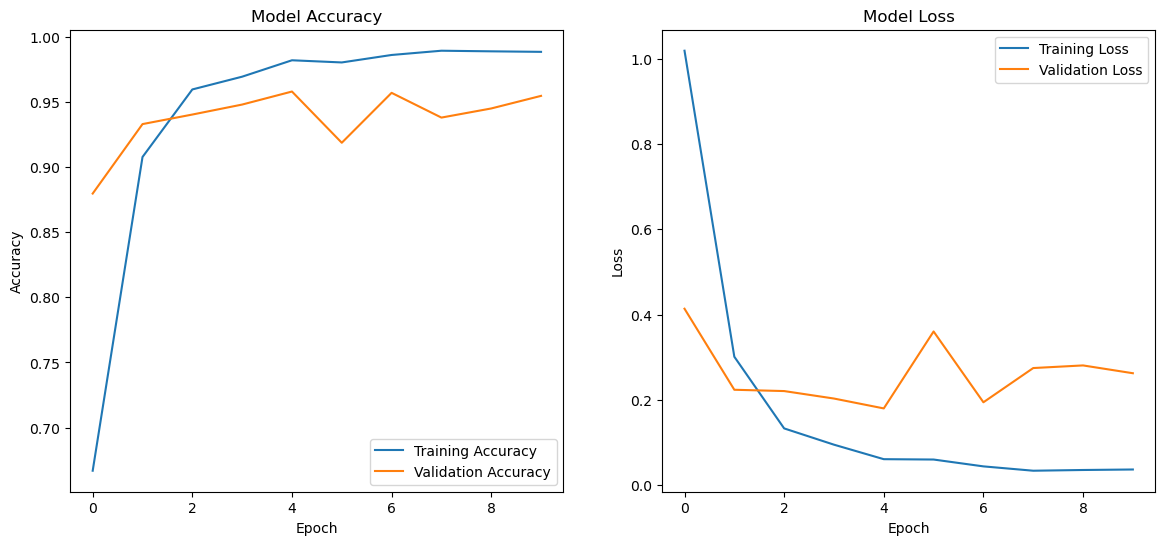

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [10]:
import numpy as np
from sklearn.metrics import classification_report

-
print("Calculating performance metrics on the test set...")


y_true = []
for images, labels in test_dataset:
  
  y_true.extend(np.argmax(labels.numpy(), axis=1))


y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)


print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Calculating performance metrics on the test set...
657/657 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step

Classification Report:

              precision    recall  f1-score   support

        Bean       0.15      0.07      0.10      3000
Bitter_Gourd       0.70      0.07      0.12     15000
Bottle_Gourd       0.14      0.07      0.09      3000
     Brinjal       0.00      0.00      0.00         0
    Broccoli       0.00      0.00      0.00         0
     Cabbage       0.00      0.00      0.00         0
    Capsicum       0.00      0.00      0.00         0
      Carrot       0.00      0.00      0.00         0
 Cauliflower       0.00      0.00      0.00         0
    Cucumber       0.00      0.00      0.00         0
      Papaya       0.00      0.00      0.00         0
      Potato       0.00      0.00      0.00         0
     Pumpkin       0.00      0.00      0.00         0
      Radish       0.00      0.00      0.00         0
      Tomato       0.00      0.00      0.00         0

    accuracy   

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Generating the Confusion Matrix...


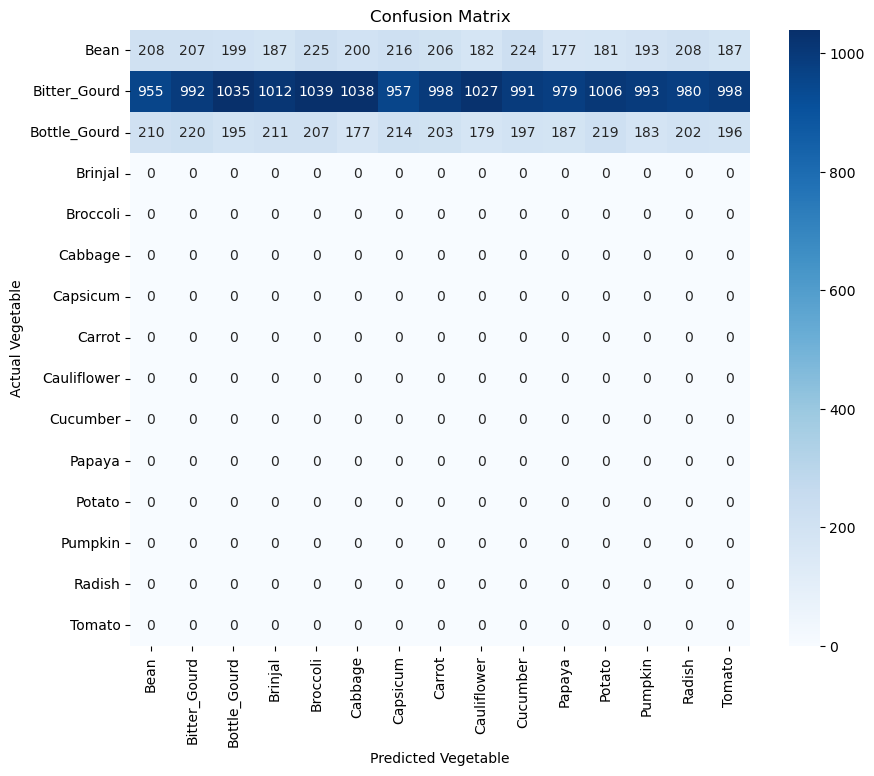

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


print("Generating the Confusion Matrix...")


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('Actual Vegetable')
plt.xlabel('Predicted Vegetable')
plt.show()